In [1]:
# 前で使用したデータセットの再準備

from pandas import read_excel
DATA_FILE = "Concrete_Data.xls"
data = read_excel(DATA_FILE)

data.columns = [col.split()[0][:6].strip() for col in data.columns]
x = data.iloc[:, :8]
t = data.iloc[:, 8]

from sklearn.model_selection import train_test_split
x_train, x_test, t_train, t_test = train_test_split(x, t, random_state=0)

In [2]:
# サポートベクターマシン（SVM）モデルを使用する

from sklearn.svm import SVR
model = SVR()
model.fit(x_train, t_train)

SVR()

In [3]:
# 学習したモデルにスコアをつける
# 回帰モデルの場合、以下でR^2（分散に占めるパーセント）が分かる

model.score(x_test, t_test)

0.2615445093196369

In [6]:
# RMS誤差の計算

from sklearn.metrics import mean_squared_error
mean_squared_error(t_test, model.predict(x_test)) ** 0.5

13.713522137829438

In [7]:
# SVRモデルのチューニング

from sklearn.model_selection import GridSearchCV

model = SVR()
params = {"kernel":("linear", "rbf"), "C":[1, 10]}
grid = GridSearchCV(model, params)
grid.fit(x_train, t_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [8]:
grid.best_estimator_

SVR(C=1, kernel='linear')

In [9]:
grid.score(x_test, t_test)

0.6147462010115321

In [10]:
mean_squared_error(t_test, grid.predict(x_test)) ** 0.5

9.905133082085326

<AxesSubplot:>

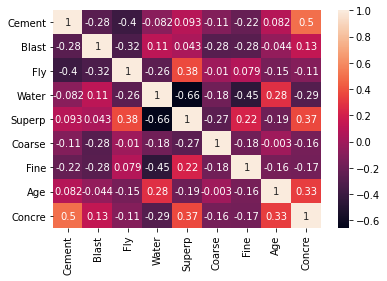

In [13]:
# 各特徴が他の特徴やターゲットとどのように相関しているかを示すヒートマップを表示する

import seaborn as sns
corr = data.corr()
sns.heatmap(corr, annot=True)

In [ ]:
# コンクリート列で見た際に強い相関（正負ともに）は以下となる
# セメント0.5、水-0.29、可塑剤(Superp)0.37、年齢0.33

In [15]:
# 上記4つのパラメータのみ使用する

cols = [0, 3, 4, 7]
x3_train = x_train.iloc[:, cols]
x3_test = x_test.iloc[:, cols]

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x3_train, t_train)

LinearRegression()

In [16]:
model.score(x3_test, t_test)

0.5407030956889054

In [17]:
from sklearn.metrics import mean_squared_error
mean_squared_error(t_test, model.predict(x3_test)) ** 0.5

10.815176443037187

In [20]:
# 各特徴量を調べる

from seaborn import distplot
from scipy.stats import norm
from statsmodels.api import qqplot
import numpy as np

d:\teramoto\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Water', ylabel='Density'>

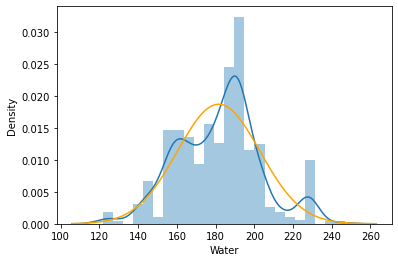

In [23]:
# 水の場合

distplot(a=data.Water, fit=norm, hist=True, kde=True, fit_kws={"color": "orange"})

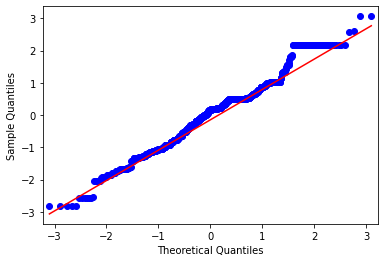

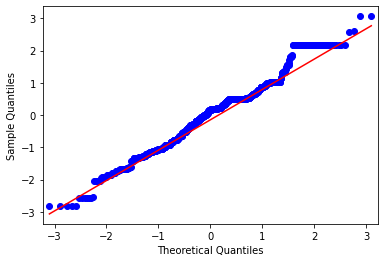

In [24]:
qqplot(data.Water, line="q", fit=True)

d:\teramoto\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

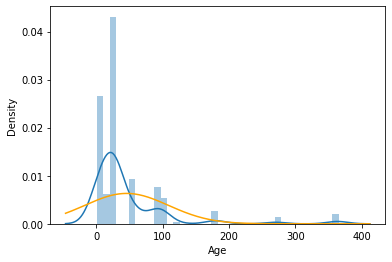

In [25]:
# Ageの場合

distplot(a=data.Age, fit=norm, hist=True, kde=True, fit_kws={"color": "orange"})

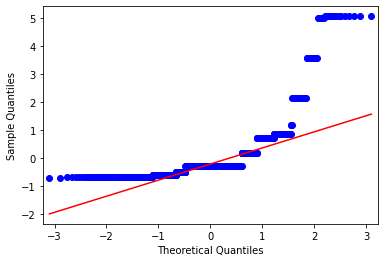

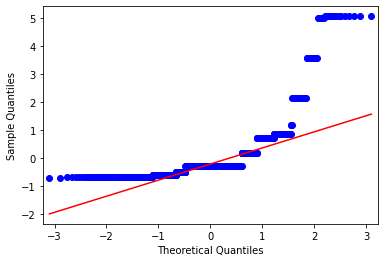

In [27]:
qqplot(data.Age, line="q", fit=True)

d:\teramoto\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

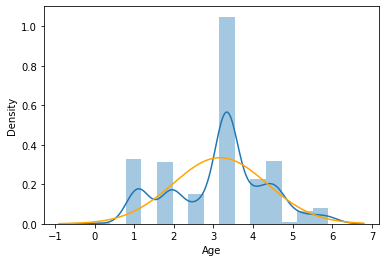

In [28]:
# Ageデータをlogにする
# 正規分布に従うようになった

distplot(a=np.log(data.Age), fit=norm, hist=True, kde=True, fit_kws={"color": "orange"})

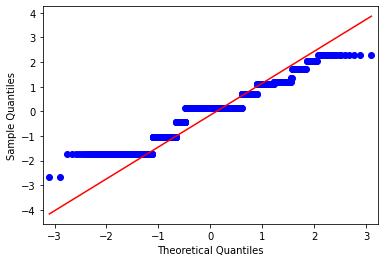

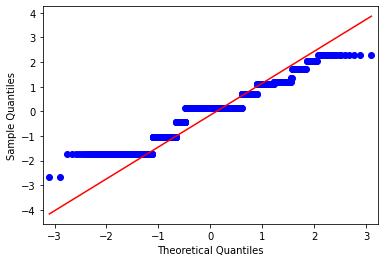

In [29]:
qqplot(np.log(data.Age), line="q", fit=True)

In [ ]:
# いままでの結果はAgeが原因の可能性がある
# よってAgeにlogをかけて再評価する

In [32]:
x4_train = x_train.copy()
x4_train.Age = np.log(x4_train.Age)
x4_test = x_test.copy()
x4_test.Age = np.log(x4_test.Age)

model = LinearRegression()
model.fit(x4_train, t_train)

LinearRegression()

In [33]:
model.score(x4_test, t_test)

0.8301413313662181

In [34]:
mean_squared_error(t_test, model.predict(x4_test)) ** 0.5

6.577043402521862